In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.mpl_style','default')

C:\Users\ktlan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
consumerKey = 'XXXXXXXXXXXXX'
consumerSecret = 'XXXXXXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key=consumerKey, consumer_secret=consumerSecret)

api = tweepy.API(auth)

In [4]:
result = api.search(q='%23LetsGoPens')
len(result)

15

In [5]:
tweet = result[0]

for param in dir(tweet):
    if not param.startswith("_"):
        print ("%s : %s\n" % (param, eval('tweet.'+param)))

author : User(_api=<tweepy.api.API object at 0x0000018436A47550>, _json={'id': 51047018, 'id_str': '51047018', 'name': 'Marjorie', 'screen_name': 'CappuccinoThyme', 'location': 'Austin, Texas', 'description': 'Australian-American I ❤️Family, our President, pray for his success to MAGA🇺🇸 God Bless President Trump and our beautiful country🇺🇸', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 918, 'friends_count': 760, 'listed_count': 1, 'created_at': 'Fri Jun 26 13:02:09 +0000 2009', 'favourites_count': 12439, 'utc_offset': -14400, 'time_zone': 'Eastern Time (US & Canada)', 'geo_enabled': False, 'verified': False, 'statuses_count': 18264, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '1A6283', 'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/19990680/cap_twitter11.jpg', 'profile_background_image_url_https': 'https://pbs.twimg.com

In [6]:
results = []

for tweet in tweepy.Cursor(api.search, q='%23LetsGoPens').items(100):
    results.append(tweet)
    
print (len(results))

100


In [7]:
def toDataFrame(tweets):
    
    DataSet = pd.DataFrame()
    
    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]
    
    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet in tweets]
    DataSet['userName'] = [tweet.user.screen_name for tweet in tweets]
    DataSet['userCreatedDt'] = [tweet.user.created_at for tweet in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet in tweets]
    
    return DataSet

DataSet = toDataFrame(results)

In [8]:
DataSet.head(5)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreatedDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
0,915782165643907072,RT @LeightonMedved: Everyone singing the anthe...,13,0,Twitter for iPad,2017-10-05 03:34:17,51047018,CappuccinoThyme,CappuccinoThyme,2009-06-26 13:02:09,"Australian-American I ❤️Family, our President,...",918,760,"Austin, Texas",Eastern Time (US & Canada)
1,915782157238505472,RT @NHL: Opening Night!\n#TMLtalk vs. #GoJetsG...,198,0,Twitter for iPhone,2017-10-05 03:34:15,405413266,MartinRietz,MartinRietz,2011-11-05 08:37:57,Östra SK #91,524,591,"Jönköping, Sverige",Pacific Time (US & Canada)
2,915782077647347712,#LetsGoPens,0,0,Twitter Web Client,2017-10-05 03:33:56,803106754531913728,rogercarlson700,rogercarlson700,2016-11-28 05:22:26,My name is Roger Carlson and I am 2⃣0⃣ yrs old...,184,1331,"Keene, NH",None
3,915781997003526144,I really thought Murray would have patched tha...,0,0,Twitter for iPhone,2017-10-05 03:33:37,235539596,TJ_Keklak,TJ_Keklak,2011-01-08 13:08:54,Kent State Wrestling Alumni with a B.S. in Exe...,385,424,New York Chiropractic College,Eastern Time (US & Canada)
4,915781973473468417,https://t.co/f3cM0z8aa4 Did you miss the @peng...,1,0,Twitter for iPhone,2017-10-05 03:33:31,804410743860785152,PghMinorSport,PghMinorSport,2016-12-01 19:44:01,Authored by Greg Morton,11,11,,None


In [9]:
DataSet.tail(5)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreatedDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
95,915775684903145473,Not the way I wanted to start the season but w...,0,1,Twitter for iPhone,2017-10-05 03:08:32,1184923273,JimmerC3,JimmerC3,2013-02-16 06:47:58,Strive For Greatness. Psalms 23:4,640,661,Trying to find my golf ball...,None
96,915775673188470784,RT @WWEGraves: That banner looks REALLY great!...,126,0,Twitter for iPhone,2017-10-05 03:08:29,788116885392896000,KellyMi26977581,KellyMi26977581,2016-10-17 20:38:03,,6,39,"Sewickley, PA",None
97,915775544024879104,Full recap of the game coming tomorrow. #LetsG...,0,1,Twitter Web Client,2017-10-05 03:07:58,906240144067502080,highslot_hockey,highslot_hockey,2017-09-08 19:37:42,,3,68,High slot,None
98,915775543416692737,Absolutely stole a point. Could be worse. \n\n...,0,1,Twitter for Android,2017-10-05 03:07:58,816799959760703493,camocards,camocards,2017-01-05 00:14:20,"Fußball (Borussia Mönchengladbach, Chelsea), a...",36,424,US Army Veteran,None
99,915775486516752384,@penguins Didn't get the W but that was an ent...,0,9,Twitter for Android,2017-10-05 03:07:44,80850274,aastrwn,aastrwn,2009-10-08 13:38:49,"| madly in love with Amy, Violet and son (comi...",1298,750,"Apple Valley, MN",Eastern Time (US & Canada)


In [10]:
DataSet = DataSet[DataSet.userTimezone.notnull()]
len(DataSet)

47

In [11]:
tzs = DataSet['userTimezone'].value_counts()[:10]
print (tzs)

Eastern Time (US & Canada)      17
Pacific Time (US & Canada)      11
Atlantic Time (Canada)           5
Central Time (US & Canada)       5
Quito                            4
Baku                             1
International Date Line West     1
Mountain Time (US & Canada)      1
America/Detroit                  1
Arizona                          1
Name: userTimezone, dtype: int64


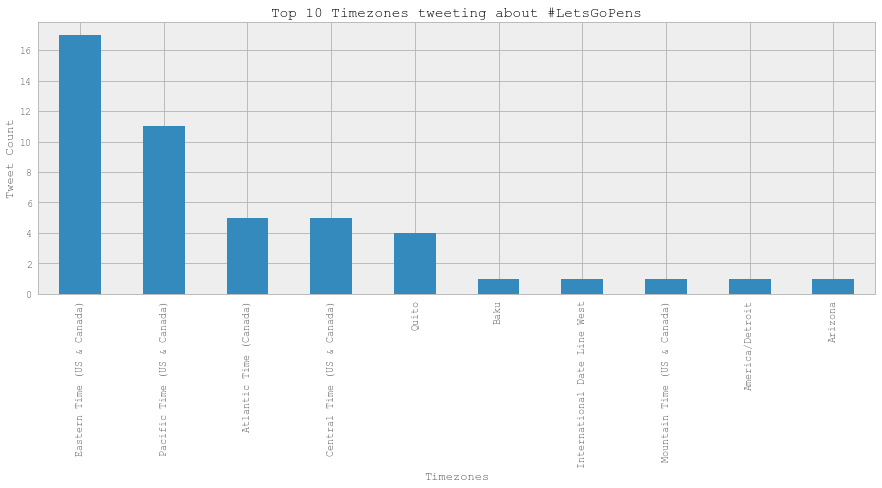

In [12]:
plt.rcParams['figure.figsize'] = (15,5)

tzs.plot(kind='bar')

plt.xlabel('Timezones')
plt.ylabel('Tweet Count')
plt.title('Top 10 Timezones tweeting about #LetsGoPens')